# Transfer Learning with Keras (train_test_split + model.fit)

In [71]:
#Load all the libraries =======================================================================
# pip install h5py==2.10.0
import matplotlib
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

## 1. Selecting and shaping the data

In [72]:
# Select the image folder =========================================================================
datapath=os.getcwd() + "\SkinDiseases"
#datapath=os.getcwd() + "\SkinArea"

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(datapath)))
random.seed()
random.shuffle(imagePaths)

# initialize the number of epochs to train for, initia learning rate,
# and batch size
batch_size=32 
epochs=50
lr = 1e-3        # Initial Learning rate

image_size = 224 # For Inception use 299 
num_classes=0    #number of classes for classification        

# initialize the data and labels
data = []
labels = []
classNum=[]
classNames=[]


#Get a list of subfolders as labels
subfolders = [ f.path for f in os.scandir(datapath) if f.is_dir() ]
i=0
for folder in subfolders:
    s = folder.split("\\")[-1]
    #print(s)
    classNum.append(i)
    classNames.append(s)
    i=i+1

num_classes=len(classNum)
print(classNum)
print(classNames)
print(num_classes)

[0, 1]
['Benign', 'Malignant']
2


In [73]:
# Create training data and labels =========================================================================
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (image_size, image_size))
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]

    i=0
    for name in classNames:
       if label == name:
            label = classNum[i]
            #print(name)
            break
       i = i+1
    labels.append(label)
    #print(label)

print(labels[0:20])

Benign
Benign
Benign
Malignant
Malignant
Malignant
Benign
Malignant
Malignant
Benign
Malignant
Malignant
Benign
Malignant
Benign
Malignant
Benign
Malignant
Malignant
Benign
Benign
Malignant
Malignant
Malignant
Malignant
Malignant
Benign
Benign
Benign
Benign
Malignant
Benign
Malignant
Benign
Malignant
Malignant
Benign
Benign
Malignant
Malignant
Benign
Malignant
Benign
Malignant
Benign
Malignant
Malignant
Benign
Benign
Malignant
Benign
Benign
Malignant
Benign
Malignant
Benign
Malignant
Benign
Benign
Malignant
Benign
Benign
Malignant
Benign
Benign
Malignant
Malignant
Benign
Benign
Benign
Benign
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Benign
Malignant
Malignant
Malignant
Benign
Malignant
Benign
Malignant
Malignant
Benign
Malignant
Malignant
Benign
Malignant
Malignant
Malignant
Benign
Malignant
Malignant
Malignant
Malignant
Malignant
Benign
Malignant
Benign
Benign
Malignant
Benign
Malignant
Benign
Benign
Benign
Malignant
Benign
Malignant
Malignant
Malignant
Mal

In [74]:
#Rescale the data, split the data, and convert the labels to vectors ==================================
# scale the image values to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print(labels[0:30])

#Split the data into training (75%) and testing (25%)
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=len(classNum))
testY = to_categorical(testY, num_classes=len(classNum))

[0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0]


## 2. Creating and training the model 

In [75]:
#Create and train the model =========================================================================
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

from tensorflow.keras.applications import (
        vgg16,
        resnet50,
        densenet,
        mobilenet_v2,
        inception_v3,
#        efficientnet
)


#Keras Models: https://keras.io/api/applications/
base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
#base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
#base_model = densenet.DenseNet201(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
#base_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
#base_model = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
#base_model = efficientnet.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
#print(base_model.summary())

    # Freeze the layers 
for layer in base_model.layers:
    layer.trainable = False
    
# # Create the model
model = Sequential()

# # Add the convolutional base model
model.add(base_model)
 
# # Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

# # Compile the model
#model.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])
#model.compile(optimizer= 'sgd' , loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.compile(optimizer= 'adam' , loss= 'categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer= 'sgd' , loss= 'categorical_crossentropy', metrics=['accuracy'])
#from keras.optimizers import SGD
#model.compile(loss='categorical_crossentropy',
#          optimizer=SGD(lr=1e-3),
#          metrics=['accuracy'])

# Start the training process
model.fit(trainX, trainY, validation_split=0.30, batch_size=32, epochs=20, verbose=2)
# Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

#save the model
model.save('model.h5')
#model.save('model-skinarea-vgg16.h5')
#model.save('model-skindisease-vgg16.h5')


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 2050      
Total params: 41,457,474
Trainable params: 26,742,786
Non-trainable params: 14,714,688
_________________________________________________________________
None
Train on 315 samples, validate on 135 samples
Epoch 1/20
315/315 - 235s - loss: 2.5270 - accur

## 3. Evaluating the model and Performing Predicitons

In [76]:
#Evaluating the Performance ========================================================================
#model = load_model('model.h5')
#model = load_model('model-skinarea-vgg16.h5')
model = load_model('model-skindisease-vgg16.h5')
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 1.2287588850657145
Test accuracy: 0.76


In [77]:
#Predicting the whole test data   ========================================================================
names = model.predict(testX)
print(len(testX))
print(names)
print(testY)

150
[[9.99154091e-01 8.45917384e-04]
 [9.99739707e-01 2.60308763e-04]
 [9.99999166e-01 8.15484498e-07]
 [6.86357953e-06 9.99993086e-01]
 [9.62988496e-01 3.70115377e-02]
 [9.99936223e-01 6.37268386e-05]
 [5.81202512e-05 9.99941826e-01]
 [4.08080959e-05 9.99959230e-01]
 [2.84001115e-04 9.99715984e-01]
 [9.99697328e-01 3.02680943e-04]
 [1.06951079e-08 1.00000000e+00]
 [9.99857545e-01 1.42461329e-04]
 [9.96374786e-01 3.62523366e-03]
 [1.24020793e-01 8.75979185e-01]
 [2.22981498e-01 7.77018547e-01]
 [9.72020984e-01 2.79789828e-02]
 [1.12753622e-02 9.88724649e-01]
 [5.63449521e-06 9.99994397e-01]
 [9.63326991e-01 3.66730541e-02]
 [8.82298276e-02 9.11770105e-01]
 [6.70391619e-01 3.29608440e-01]
 [5.67187206e-04 9.99432743e-01]
 [3.87740254e-01 6.12259686e-01]
 [1.09114796e-02 9.89088535e-01]
 [9.99990463e-01 9.57537031e-06]
 [2.63950080e-01 7.36049950e-01]
 [3.70559692e-01 6.29440308e-01]
 [9.74499643e-01 2.55004019e-02]
 [4.95939050e-04 9.99504089e-01]
 [9.99991298e-01 8.76173181e-06]
 [9.99

In [78]:
#Predicting a random test data   ========================================================================
import random
n = random.randint(0,len(testX))
print(n)
names = model.predict([[testX[n,:]]])
print(names)
print(testY[n,:])

127
[[1.5421187e-05 9.9998462e-01]]
[0. 1.]


C:/Users/xiaop/OneDrive - London South Bank University/Books/WileyBook-AI/chapter 5/SkinDiseases/Malignant/ISIC_0000141.jpg
[[0.11891437 0.8810856 ]]
Malignant


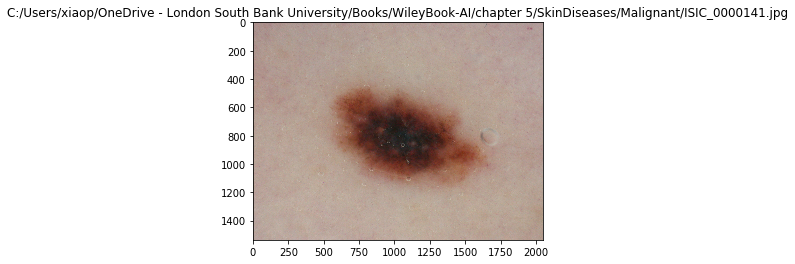

In [81]:
#Prediction on a selected Test Image ==========================================================
# pip install tk
#from Tkinter import Tk     # from tkinter import Tk for Python 3.x
import tkinter as tk
from tkinter.filedialog import askopenfilename

root = tk.Tk()
root.withdraw()
#Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename(initialdir=datapath) # show an "Open" dialog box and return the path to the selected file
print(filename)

testdata =[]
testfile = filename
image_size = 224
image = cv2.imread(testfile)
image = cv2.resize(image, (image_size, image_size))
image = img_to_array(image)
testdata.append(image)
testdata = np.array(testdata, dtype="float") / 255.0
results = model.predict(testdata)
print(results)
i=0
prediction="Unknown"
for name in classNames:
    if results[0][i]>0.4:
        prediction=name
        break
    i += 1
print(prediction)

plt.figure()
plt.title(str(testfile))
plt.imshow(cv2.cvtColor(cv2.imread(testfile), cv2.COLOR_BGR2RGB))
plt.show()

In [50]:
#from Tkinter import Tk     # from tkinter import Tk for Python 3.x
import tkinter as tk
from tkinter.filedialog import askopenfilename

root = tk.Tk()
root.withdraw()
#Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename(initialdir=datapath) # show an "Open" dialog box and return the path to the selected file
print(filename)

C:/Users/xiaop/OneDrive - London South Bank University/Books/WileyBook-AI/chapter 5/SkinArea/Neck/elen_f5-r01-02.jpg


In [61]:
#Prediction on a Test Image ==============================================================================
#This code seems to have a problem, always predict the same site????
'''
import numpy as np
from keras.preprocessing import image
base_dir = datapath
#testfile = base_dir +'\Face\elen_f4-r02-03.jpg'
#testfile = base_dir +'\Forearm\elen_f1-r02-03.jpg'
#testfile = base_dir +'\Palm\zzx_f2-r00-03.jpg'
#testfile = base_dir +'\Neck\elen_f5-r00-03.jpg'
#testfile = base_dir +'\Lowerleg\zzx_f6-r04-03.jpg'
testfile = filename

image_size = 224
test_image = image.load_img(testfile , target_size=(image_size, image_size))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
results = model.predict(test_image)
print(results)
i=0
prediction="Unknown"
for name in classNames:
    if results[0][i]>0.4:
        prediction=name
        break
    i += 1
print(prediction)

plt.figure()
plt.title(str(testfile))
plt.imshow(image.load_img(testfile ))
plt.show()
'''

ValueError: Error when checking input: expected vgg16_input to have 4 dimensions, but got array with shape (1, 1, 224, 224, 3)